Importing the modules

In [1]:

import numpy as np
from numpy.random import default_rng
import pandas as pd
from pandas.plotting import autocorrelation_plot
import scipy.stats as st
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error
from pyEDM import *

Generate red noise

In [2]:

def generate_red_noise(n=1000, alpha=0.8):
    noise = np.random.normal(size=n)
    red = np.zeros(n)
    for t in range(1, n):
        red[t] = alpha * red[t - 1] + noise[t]
    return red





Generate logistic map

In [3]:
def generate_logistic_map(n=1000, r=3.7, x0=0.5):
    x = np.zeros(n)
    x[0] = x0
    for t in range(1, n):
        x[t] = r * x[t - 1] * (1 - x[t - 1])
    return x



Normalization

In [4]:

def normalize_series(series):
    scaler = StandardScaler() # StandardScaler normalizes the data to have mean 0 and variance 1
    return scaler.fit_transform(series.reshape(-1, 1)).flatten() # returns a 1D array after normalization



Run Simplex

In [5]:
def run_simplex(ts, E, lib_range, pred_range):
    df = pd.DataFrame({'Time': np.arange(1, len(ts) + 1), 'X': ts})
    preds = Simplex(
        dataFrame=df,
        lib=lib_range,
        pred=pred_range,
        E=E,
        columns="X",
        target="X",
        showPlot=False
    )
    # Verifying the columns exist
    if 'Observations' not in preds or 'Predictions' not in preds:
        return np.nan

    valid = ~preds['Observations'].isna() # ~preds['Observations'].isna() creates a boolean mask where True indicates valid observations
    if valid.sum() == 0:
        return np.nan

    rho = preds.loc[valid, ['Observations', 'Predictions']].corr().iloc[0, 1]
    return rho




Time series and library generation

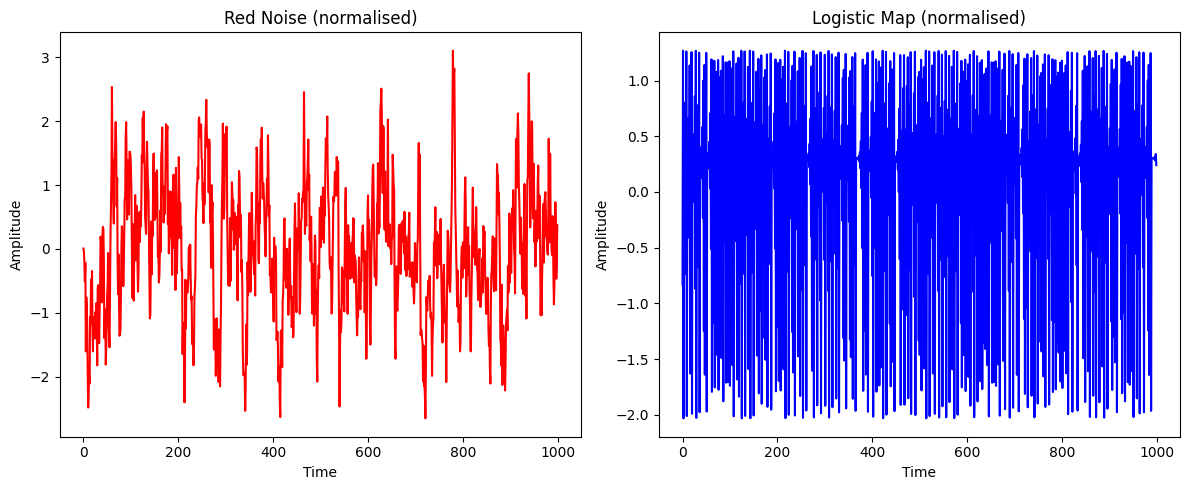

In [6]:

n = 1000
Red = normalize_series(generate_red_noise(n))
Logi = normalize_series(generate_logistic_map(n))
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(Red, color='red')
plt.title("Red Noise (normalised)")
plt.xlabel("Time")
plt.ylabel("Amplitude")

plt.subplot(1, 2, 2)
plt.plot(Logi, color='blue')
plt.title("Logistic Map (normalised)")
plt.xlabel("Time")
plt.ylabel("Amplitude")

plt.tight_layout()
plt.show()

# Parameters for the Simplex method
lib = "1 500"
pred = "501 1000"
E_values = range(2, 9)



Evaluation of embeding dimension

In [7]:
def evaluate(ts, label):
    rhos = []
    for E in E_values:
        rho = run_simplex(ts, E, lib, pred)
        rhos.append(rho)
    plt.plot(E_values, rhos, marker='o', label=label)




Plotting

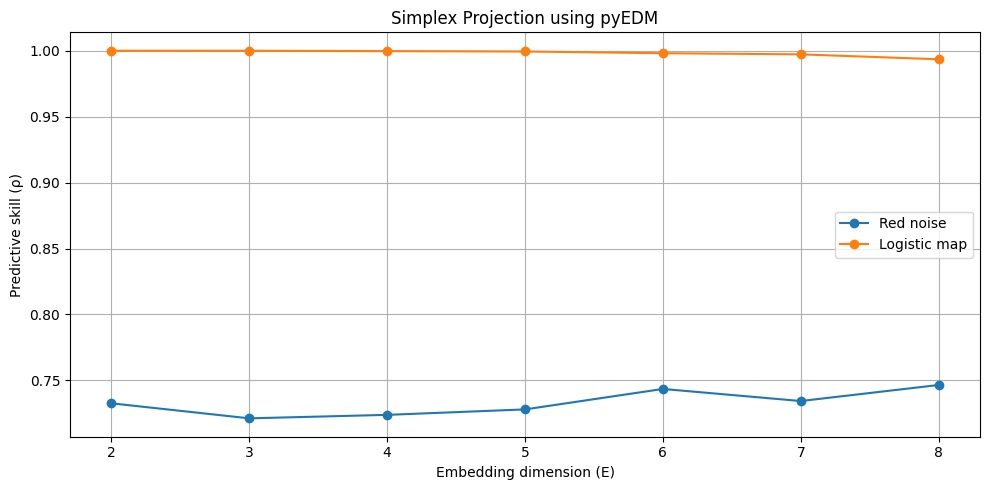

In [8]:
plt.figure(figsize=(10, 5))
evaluate(Red, "Red noise")
evaluate(Logi, "Logistic map")
plt.xlabel("Embedding dimension (E)")
plt.ylabel("Predictive skill (ρ)")
plt.title("Simplex Projection using pyEDM")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Re plotting with better viewing and highlighting the best embedding dimension

🔴 Optimal E for red noise = 8
🔵 Optimal E for logistic map = 2


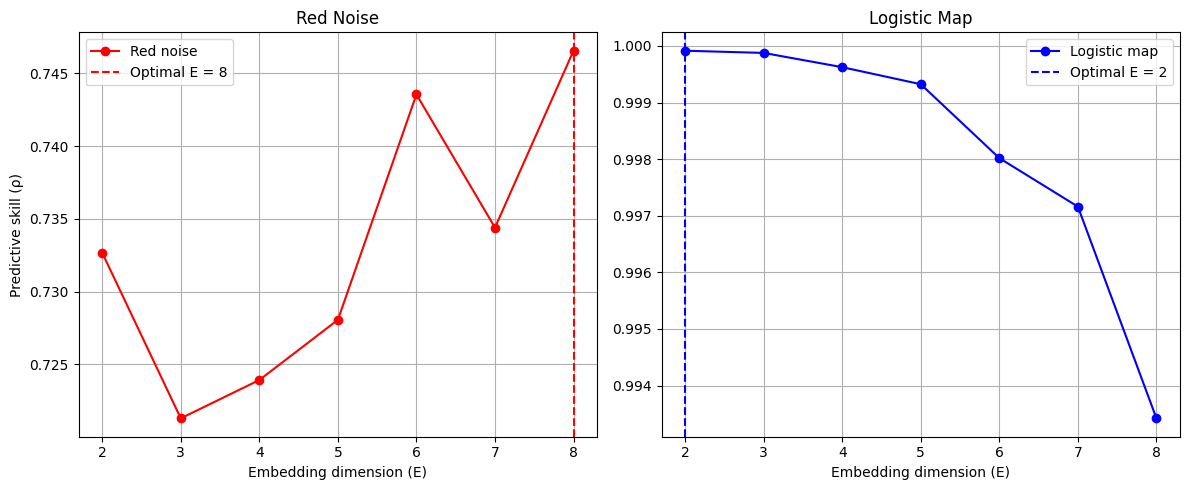

In [9]:
# Recalculating with DataFrame for better handling
def evaluate_dataframe(ts):
    data = []
    for E in E_values:
        rho = run_simplex(ts, E, lib, pred)
        data.append({'E': E, 'rho': rho})
    return pd.DataFrame(data)

# Generating DataFrames for both time series
sim_r = evaluate_dataframe(Red)
sim_l = evaluate_dataframe(Logi)

# Finding optimal E values
E_r = sim_r.loc[sim_r['rho'].idxmax(), 'E']
E_l = sim_l.loc[sim_l['rho'].idxmax(), 'E']

print(f"🔴 Optimal E for red noise = {E_r}")
print(f"🔵 Optimal E for logistic map = {E_l}")

plt.figure(figsize=(12, 5))

# Panel 1: Red noise
plt.subplot(1, 2, 1)
plt.plot(sim_r['E'], sim_r['rho'], marker='o', color='red', label='Red noise')
plt.axvline(E_r, color='red', linestyle='--', label=f'Optimal E = {E_r}')
plt.xlabel("Embedding dimension (E)")
plt.ylabel("Predictive skill (ρ)")
plt.title("Red Noise")
plt.legend()
plt.grid(True)

# Panel 2: Logistic map
plt.subplot(1, 2, 2)
plt.plot(sim_l['E'], sim_l['rho'], marker='o', color='blue', label='Logistic map')
plt.axvline(E_l, color='blue', linestyle='--', label=f'Optimal E = {E_l}')
plt.xlabel("Embedding dimension (E)")
plt.title("Logistic Map")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()



S-map evaluation function

Defining the theta values

In [10]:
# Defining theta values for the analysis
theta_values = np.arange(0, 2.1, 0.1)


Applying Smap analysis

dict_keys(['predictions', 'coefficients', 'singularValues'])
dict_keys(['predictions', 'coefficients', 'singularValues'])
dict_keys(['predictions', 'coefficients', 'singularValues'])
dict_keys(['predictions', 'coefficients', 'singularValues'])
dict_keys(['predictions', 'coefficients', 'singularValues'])
dict_keys(['predictions', 'coefficients', 'singularValues'])
dict_keys(['predictions', 'coefficients', 'singularValues'])
dict_keys(['predictions', 'coefficients', 'singularValues'])
dict_keys(['predictions', 'coefficients', 'singularValues'])
dict_keys(['predictions', 'coefficients', 'singularValues'])
dict_keys(['predictions', 'coefficients', 'singularValues'])
dict_keys(['predictions', 'coefficients', 'singularValues'])
dict_keys(['predictions', 'coefficients', 'singularValues'])
dict_keys(['predictions', 'coefficients', 'singularValues'])
dict_keys(['predictions', 'coefficients', 'singularValues'])
dict_keys(['predictions', 'coefficients', 'singularValues'])
dict_keys(['predictions'

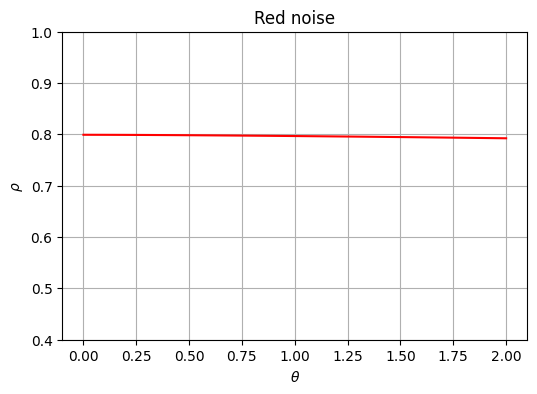

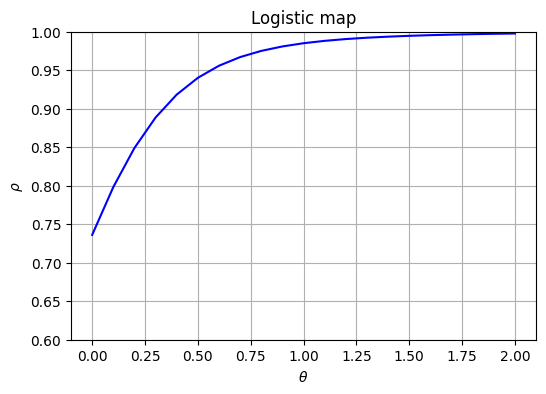

🔴 Optimal theta for red noise = 0.0
🔵 Optimal theta for logistic map = 2.0
    theta       rho
0     0.0  0.799242
1     0.1  0.799157
2     0.2  0.799022
3     0.3  0.798843
4     0.4  0.798626
5     0.5  0.798376
6     0.6  0.798098
7     0.7  0.797796
8     0.8  0.797472
9     0.9  0.797130
10    1.0  0.796771
11    1.1  0.796398
12    1.2  0.796009
13    1.3  0.795608
14    1.4  0.795193
15    1.5  0.794765
16    1.6  0.794323
17    1.7  0.793868
18    1.8  0.793400
19    1.9  0.792917
20    2.0  0.792418


In [11]:

def run_smap(ts, E, lib_range, pred_range, thetas):
    df = pd.DataFrame({'Time': np.arange(1, len(ts) + 1), 'X': ts})
    results = []
    for theta in thetas:
        res = SMap(
            dataFrame=df,

            lib=lib_range,
            pred=pred_range,
            E=E,
            columns="X",
            target="X",
            theta=theta,
            showPlot=False
        )
        # res is expected to be a dictionary with 'predictions' key
        preds = res.get('predictions')  # or a similar key depending on the library's output

        # Debugging output
        print(res.keys())

        if preds is None:
            rho = np.nan
        else:
            # preds should be a DataFrame with 'Observations' and 'Predictions'
            valid = ~preds['Observations'].isna()
            if valid.sum() == 0:
                rho = np.nan
            else:
                rho = preds.loc[valid, ['Observations', 'Predictions']].corr().iloc[0, 1]
        results.append({'theta': theta, 'rho': rho})
    return pd.DataFrame(results)



# Executing the SMap analysis for both time series
smap_r = run_smap(Red, E_r, lib, pred, theta_values)
smap_l = run_smap(Logi, E_l, lib, pred, theta_values)

# 🔴 Red noise
plt.figure(figsize=(6, 4))
plt.plot(smap_r['theta'], smap_r['rho'], color='red')
plt.ylim(0.4, 1.0)
plt.xlabel(r'$\theta$')
plt.ylabel(r'$\rho$')
plt.title('Red noise')
plt.grid(True)
plt.show()

# 🔵 Logistic map
plt.figure(figsize=(6, 4))
plt.plot(smap_l['theta'], smap_l['rho'], color='blue')
plt.ylim(0.6, 1)
plt.xlabel(r'$\theta$')
plt.ylabel(r'$\rho$')
plt.title('Logistic map')
plt.grid(True)
plt.show()



the_r = smap_r.loc[smap_r['rho'].idxmax(), 'theta']
the_l = smap_l.loc[smap_l['rho'].idxmax(), 'theta']

print(f"🔴 Optimal theta for red noise = {the_r}")
print(f"🔵 Optimal theta for logistic map = {the_l}")
print(smap_r)




CCM 

Implementing the Moran model : Using a csv file containing the preloaded Moran Model

In [12]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Loading the file and normalizing the time series data
def load_and_normalize(fp):
    df = pd.read_csv(fp)
    ts = df.iloc[:, 1:]  # Assuming the first column is time or index
    return pd.DataFrame(StandardScaler().fit_transform(ts), columns=ts.columns)
dam = load_and_normalize('ESM3_Data_moran.csv')
dac = load_and_normalize('ESM4_Data_competition.csv')


We look for the best embedding dimension

In [13]:


def find_best_E(df, col_lib, col_target):
    results = []
    col_name = f"{col_lib}:{col_target}"

    for E in range(2, 9):
        out = CCM(
            dataFrame=df,
            columns=col_lib,
            target=col_target,
            E=E,
            Tp=-1,
            libSizes="10 990 980",  # libSize min max step 
            sample=1,
            showPlot=False
        )

        if col_name not in out.columns:
            raise ValueError(f"Expected column '{col_name}' not found. Got: {out.columns}")

        rho = out[col_name].iloc[-1]  #Last value of the correlation coefficient
        results.append((E, rho))

    return max(results, key=lambda x: x[1])[0]


E_n1 = find_best_E(dam, "N1", "N2")
E_n2 = find_best_E(dam, "N2", "N1")
E_m1 = find_best_E(dac, "M1", "M2")
E_m2 = find_best_E(dac, "M2", "M1")
print("E pour N1→N2:", E_n1, "– N2→N1:", E_n2)
print("E pour M1→M2:", E_m1, "– M2→M1:", E_m2)


E pour N1→N2: 8 – N2→N1: 8
E pour M1→M2: 5 – M2→M1: 7


Applying Convergent Cross Mapping

In [14]:

from scipy.stats import kendalltau
def run_ccm_bootstrap(df, col_lib, col_trg, E, libs, samples=200, seed=2301):
    out = CCM(
        dataFrame=df, columns=col_lib, target=col_trg,
        E=E, Tp=0, libSizes=" ".join(map(str, libs)),
        sample=samples, seed=seed,
        showPlot=False, includeData=True
    )
    print("Keys returned by pyEDM.CCM:", out.keys())
    return out["PredictStats1"]  # or PredictStats2, depends on the causality's direction

def summarize_trend(df_rho, col_name):
    stats = df_rho.groupby('LibSize')[col_name].quantile([0.25, 0.5, 0.75]).unstack()
    tau = {}
    for q in stats.columns:
        tau[q] = kendalltau(stats.index.astype(float), stats[q]).correlation
    return stats, tau


libs = list(range(20, 81, 20)) + list(range(100, 1001, 100))

for label, df, E in [
    ("N1→N2", dam, E_n1),
    ("N2→N1", dam, E_n2),
    ("M1→M2", dac, E_m1),
    ("M2→M1", dac, E_m2),
]:
    col_lib, col_trg = label.split("→")
    df_rho = run_ccm_bootstrap(df, col_lib, col_trg, E, libs)
    col_name = f"{col_lib}:{col_trg}"
    stats, tau = summarize_trend(df_rho, "rho")
    print(f"\n{label}, tau quantiles : {tau}")


Keys returned by pyEDM.CCM: dict_keys(['LibMeans', 'PredictStats1', 'PredictStats2'])

N1→N2, tau quantiles : {0.25: np.float64(1.0), 0.5: np.float64(1.0), 0.75: np.float64(0.9560439560439562)}
Keys returned by pyEDM.CCM: dict_keys(['LibMeans', 'PredictStats1', 'PredictStats2'])

N2→N1, tau quantiles : {0.25: np.float64(0.8901098901098902), 0.5: np.float64(0.5384615384615384), 0.75: np.float64(0.16483516483516486)}
Keys returned by pyEDM.CCM: dict_keys(['LibMeans', 'PredictStats1', 'PredictStats2'])

M1→M2, tau quantiles : {0.25: np.float64(1.0), 0.5: np.float64(1.0), 0.75: np.float64(1.0)}
Keys returned by pyEDM.CCM: dict_keys(['LibMeans', 'PredictStats1', 'PredictStats2'])

M2→M1, tau quantiles : {0.25: np.float64(1.0), 0.5: np.float64(1.0), 0.75: np.float64(1.0)}


And then plot the results

Keys returned by pyEDM.CCM: dict_keys(['LibMeans', 'PredictStats1', 'PredictStats2'])
<class 'pandas.core.frame.DataFrame'>
             0.25      0.50      0.75
LibSize                              
20       0.738750  0.778685  0.821670
40       0.847163  0.863850  0.878258
60       0.879968  0.887490  0.897285
80       0.893898  0.899155  0.903168
100      0.899088  0.902890  0.906482
200      0.905515  0.907615  0.909443
300      0.906632  0.908165  0.909632
400      0.907157  0.908310  0.909512
500      0.908190  0.909195  0.910480
600      0.908913  0.909855  0.910835
700      0.909757  0.910485  0.911230
800      0.910155  0.910850  0.911295
900      0.910527  0.910935  0.911405
1000     0.911360  0.911360  0.911360
Index([0.25, 0.5, 0.75], dtype='float64')
Index([20, 40, 60, 80, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000], dtype='int64', name='LibSize')
Keys returned by pyEDM.CCM: dict_keys(['LibMeans', 'PredictStats1', 'PredictStats2'])

➡️ Vérification des colonnes dans

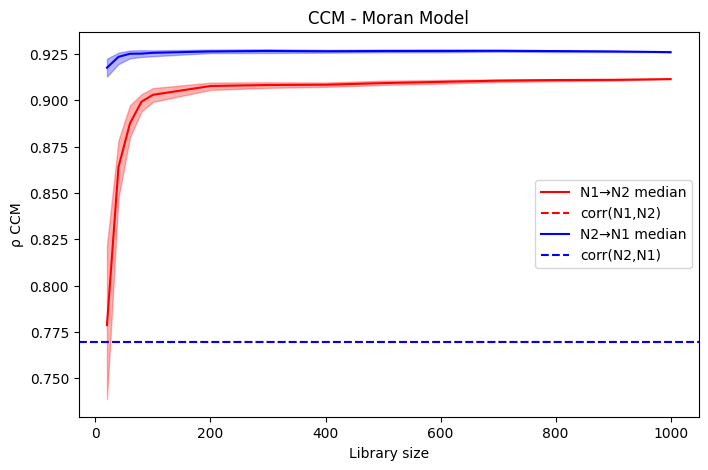

In [15]:


import pandas as pd
import matplotlib.pyplot as plt

def plot_ccm(stats, df, cols, libs, color, label):
    x = stats.index  # LibSizes

    # Tracé de la médiane + intervalle interquartile
    plt.plot(x, stats[0.5], color=color, label=label + " median")
    plt.fill_between(x, stats[0.25], stats[0.75], color=color, alpha=0.3)

    # Affichage des colonnes disponibles
    print(f"\n➡️ Vérification des colonnes dans le DataFrame : {df.columns.tolist()}")
    
    col1, col2 = cols

    if col1 in df.columns and col2 in df.columns:
        corr0 = df[col1].corr(df[col2])
        print(f"✅ Corrélation entre {col1} et {col2} : {corr0}")

        if not pd.isna(corr0):
            plt.axhline(corr0, color=color, linestyle='--', label=f"corr({col1},{col2})")
        else:
            print(f"⚠️ La corrélation est NaN. Ligne pointillée non tracée.")
    else:
        print(f"❌ Erreur : une des colonnes {col1} ou {col2} est absente de df.")

# REcuperating the results for N1→N2 and N2→N1
res, _ = summarize_trend(run_ccm_bootstrap(dam, "N1", "N2", E_n1, libs), "rho")

print(type(res))
print(res)
print(res.columns if hasattr(res, 'columns') else "No columns")
print(res.index if hasattr(res, 'index') else "No index")

# Réutilisation des fonctions et affichage
plt.figure(figsize=(8, 5))

stats_1, _ = summarize_trend(run_ccm_bootstrap(dam, "N1", "N2", E_n1, libs), "rho")
plot_ccm(stats_1, dam, ("N1", "N2"), libs, "red", "N1→N2")

stats_2, _ = summarize_trend(run_ccm_bootstrap(dam, "N2", "N1", E_n2, libs), "rho")
plot_ccm(stats_2, dam, ("N2", "N1"), libs, "blue", "N2→N1")


plt.xlabel("Library size")
plt.ylabel("ρ CCM")
plt.title("CCM - Moran Model")
plt.legend()
plt.show()




Univariate, multivariate and multi-view embbedings

Simulating the 5-species model

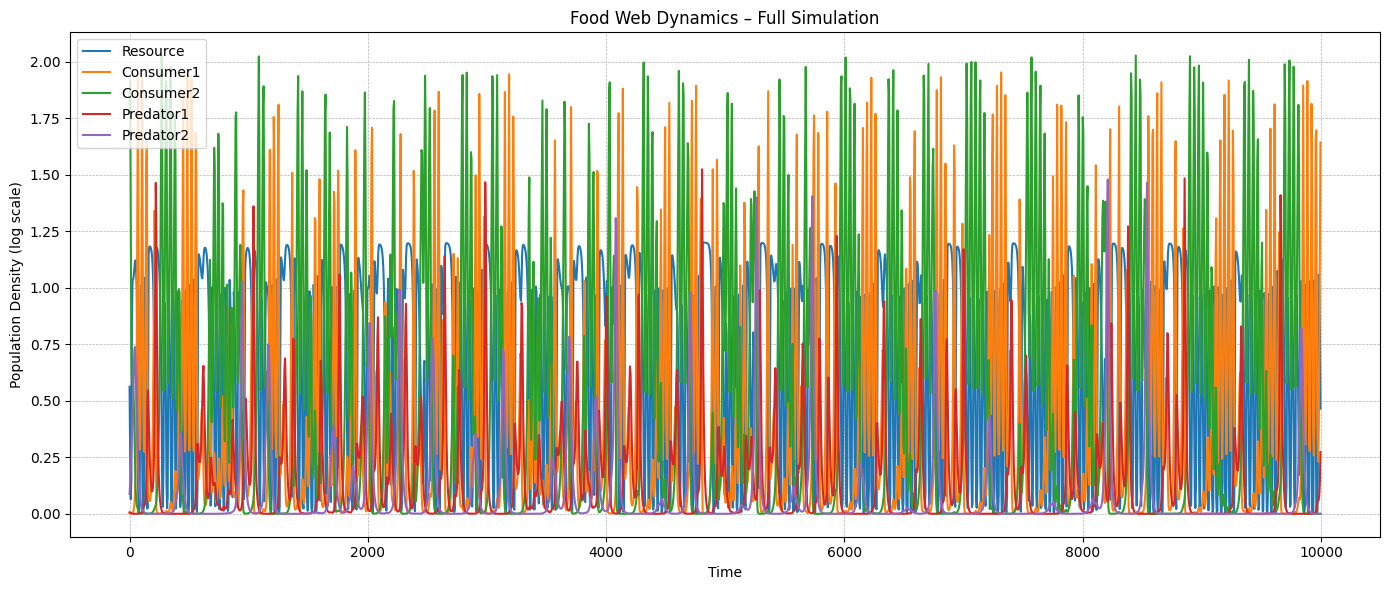

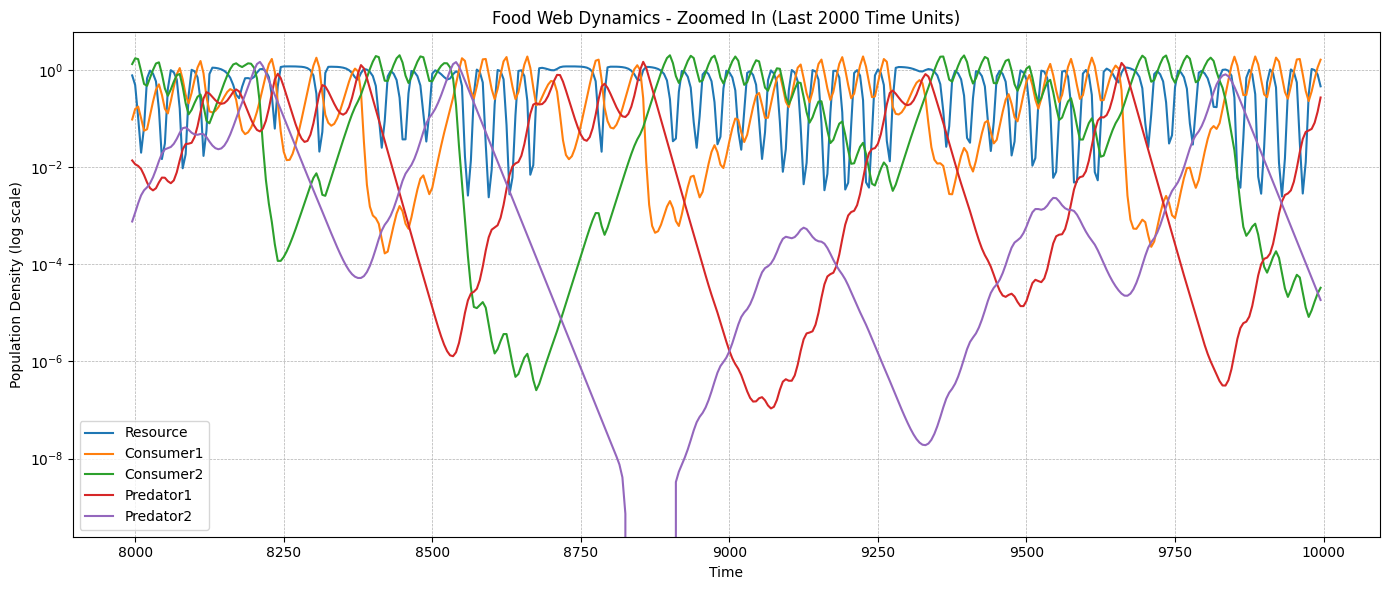

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

def food_web(t, y, params):
    R, C1, C2, P1, P2 = y

    # Prevent numerical issues (e.g., division by zero)
    R = max(R, 1e-8)
    C1 = max(C1, 1e-8)
    C2 = max(C2, 1e-8)
    P1 = max(P1, 1e-8)
    P2 = max(P2, 1e-8)

    # Unpack parameters
    nu1 = params['nu1']
    nu2 = params['nu2']
    lambda1 = params['lambda1']
    lambda2 = params['lambda2']
    C1star = params['C1star']
    C2star = params['C2star']
    mu1 = params['mu1']
    mu2 = params['mu2']
    kappa1 = params['kappa1']
    kappa2 = params['kappa2']
    Rstar = params['Rstar']
    k = params['k']

    # ODEs
    dRdt = R * (1 - R / k) - mu1 * kappa1 * (C1 * R) / (R + Rstar) - mu2 * kappa2 * (C2 * R) / (R + Rstar)
    dC1dt = mu1 * kappa1 * (C1 * R) / (R + Rstar) - nu1 * lambda1 * (P1 * C1) / (C1 + C1star) - mu1 * C1
    dC2dt = mu2 * kappa2 * (C2 * R) / (R + Rstar) - nu2 * lambda2 * (P2 * C2) / (C2 + C2star) - mu2 * C2
    dP1dt = nu1 * lambda1 * (P1 * C1) / (C1 + C1star) - nu1 * P1
    dP2dt = nu2 * lambda2 * (P2 * C2) / (C2 + C2star) - nu2 * P2

    return [dRdt, dC1dt, dC2dt, dP1dt, dP2dt]

# --- Parameters from the R code ---
params = {
    'nu1': 0.1, 'nu2': 0.07,
    'lambda1': 3.2, 'lambda2': 2.9,
    'C1star': 0.5, 'C2star': 0.5,
    'mu1': 0.15, 'mu2': 0.15,
    'kappa1': 2.5, 'kappa2': 2.0,
    'Rstar': 0.3,
    'k': 1.2
}

# --- Initial conditions: [R, C1, C2, P1, P2] ---
y0 = [1.0, 0.5, 0.8, 0.7, 0.8]

# --- Time settings ---
tmax = 10000
tau = 5
dt = 0.01
burn_in_duration = 200
t_eval = np.arange(0, tmax, tau)

# --- Burn-in phase (before integration) ---
Xi = np.array(y0)
for _ in range(int(burn_in_duration / dt)):
    dXi = food_web(0, Xi, params)
    Xi = Xi + dt * np.array(dXi)

# --- Integrate ODE system with post-burn initial condition ---
sol = solve_ivp(
    fun=food_web,
    t_span=(0, tmax),
    y0=Xi,
    args=(params,),
    t_eval=t_eval,
    method='RK45',
    rtol=1e-6,
    atol=1e-9
)
# Convert solution to DataFrame
df = pd.DataFrame({
    'time': sol.t,
    'Resource': sol.y[0],
    'Consumer1': sol.y[1],
    'Consumer2': sol.y[2],
    'Predator1': sol.y[3],
    'Predator2': sol.y[4]
})


# --- Plot 1: Full time range ---
plt.figure(figsize=(14, 6))
for col in ['Resource', 'Consumer1', 'Consumer2', 'Predator1', 'Predator2']:
    plt.plot(df['time'], df[col], label=col)

plt.xlabel("Time")
plt.ylabel("Population Density (log scale)")
plt.title("Food Web Dynamics – Full Simulation")
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

# --- Plot 2: Zoomed-in (e.g., last 2000 time units) ---
time_start = df['time'].max() - 2000
df_zoom = df[df['time'] >= time_start]

plt.figure(figsize=(14, 6))
for col in ['Resource', 'Consumer1', 'Consumer2', 'Predator1', 'Predator2']:
    plt.plot(df_zoom['time'], df_zoom[col], label=col)

plt.xlabel("Time")
plt.ylabel("Population Density (log scale)")
plt.yscale('log')
plt.title("Food Web Dynamics - Zoomed In (Last 2000 Time Units)")
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()



Univariate Embedding


Testing E=1
     Time  Observations  Predictions  Pred_Variance
1  5005.0      0.049143     0.028169       0.000006
2  5010.0      0.064449     0.066647       0.000119
3  5015.0      0.086729     0.092102       0.001233
4  5020.0      0.093598     0.093687       0.003364
5  5025.0      0.054572     0.152620       0.000039
Number of valid predictions for E=1 : 999
Estimated MAE for E=1 = 0.19072843946136717

Testing E=2
     Time  Observations  Predictions  Pred_Variance
1  5005.0      0.049143     0.036245       0.000249
2  5010.0      0.064449     0.055150       0.000717
3  5015.0      0.086729     0.094872       0.001110
4  5020.0      0.093598     0.159694       0.000643
5  5025.0      0.054572     0.102051       0.000176
Number of valid predictions for E=2 : 999
Estimated MAE for E=2 = 0.0480758915659278

Testing E=3
     Time  Observations  Predictions  Pred_Variance
1  5005.0      0.049143     0.046708       0.000537
2  5010.0      0.064449     0.060399       0.000671
3  5015.0 

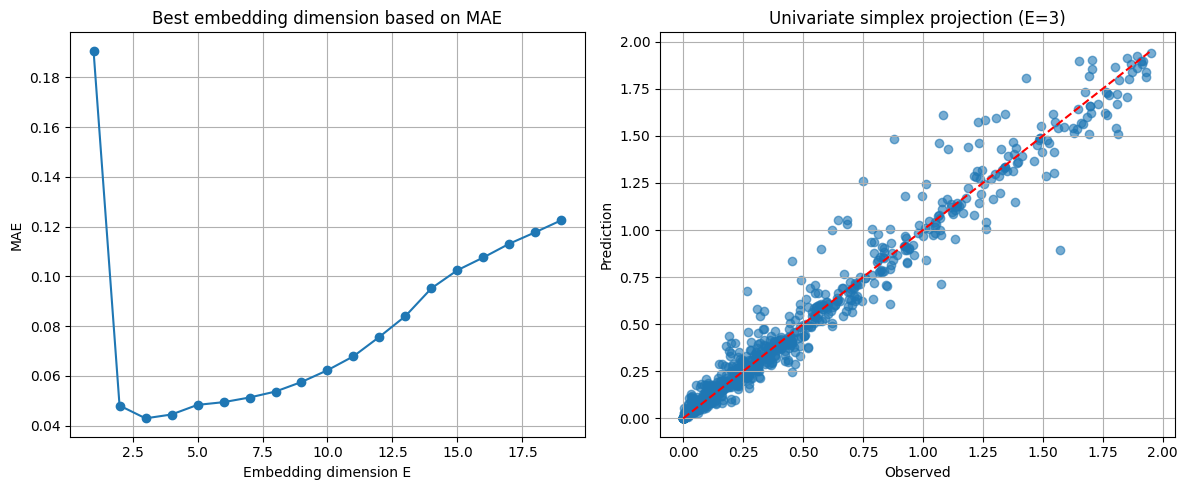

Prediction skill (ρ) : 0.985


In [17]:

df_C1 = pd.DataFrame({
    "time": sol.t,
    "C1": sol.y[1]  # Consumer1 time series
})

lib_start = 1
lib_end = len(df_C1) // 2
pred_start = lib_end + 1
pred_end = len(df_C1)


results_list = []

# Looping on different embedding dimensions E
for E in range(1, 20):
    print(f"\nTesting E={E}")
    res = Simplex(
        dataFrame=df_C1,
        lib=f"{lib_start} {lib_end}",
        pred=f"{pred_start} {pred_end}",
        E=E,
        columns="C1",
        target="C1",
    )

    # Deleting rows with NaN in Predictions or Observations
    res = res.dropna(subset=["Predictions", "Observations"])

    obs_valid = res['Observations'].values
    pred_valid = res['Predictions'].values

    print(res.head())
    print(f"Number of valid predictions for E={E} : {len(obs_valid)}")

    if len(obs_valid) > 0:
        mae = np.mean(np.abs(obs_valid - pred_valid))
    else:
        mae = np.nan

    print(f"Estimated MAE for E={E} = {mae}")
    results_list.append({"E": E, "MAE": mae})

# Results as a DataFrame
results_df = pd.DataFrame(results_list)
if results_df['MAE'].notna().any():
    bestE = results_df.loc[results_df['MAE'].idxmin(), 'E']
    print(f"\nBest embedding dimension : E = {bestE}")

    # Run Simplex with best E
    simp_C1 = Simplex(
        dataFrame=df_C1,
        lib=f"{lib_start} {lib_end}",
        pred=f"{pred_start} {pred_end}",
        E=int(bestE),
        columns="C1",
        target="C1",
    )

    simp_C1 = simp_C1.dropna(subset=["Predictions", "Observations"])
    obs_valid = simp_C1['Observations'].values
    pred_valid = simp_C1['Predictions'].values

    # Create figure with 2 subplots side by side
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))

    # Left panel: MAE vs E
    axes[0].plot(results_df['E'], results_df['MAE'], marker='o')
    axes[0].set_xlabel("Embedding dimension E")
    axes[0].set_ylabel("MAE")
    axes[0].set_title("Best embedding dimension based on MAE")
    axes[0].grid(True)

    # Right panel: Observed vs Predicted scatter
    axes[1].scatter(obs_valid, pred_valid, alpha=0.6)
    axes[1].plot([obs_valid.min(), obs_valid.max()], [obs_valid.min(), obs_valid.max()], 'r--')
    axes[1].set_xlabel("Observed")
    axes[1].set_ylabel("Prediction")
    axes[1].set_title(f"Univariate simplex projection (E={bestE})")
    axes[1].grid(True)

    plt.tight_layout()
    plt.show()

    # Rho calculation
    rho = np.corrcoef(obs_valid, pred_valid)[0, 1]
    print(f"Prediction skill (ρ) : {rho:.3f}")

else:
    print("Error : No valid MAE values found for any embedding dimension E.")



Multivariate embedding

lib = 1 1000
pred = 1001 2000

Testing multivariate E=3
MAE for E=3: 0.06190310993254831

Testing multivariate E=4
MAE for E=4: 0.06190310993254831

Testing multivariate E=5
MAE for E=5: 0.06190310993254831

Testing multivariate E=6
MAE for E=6: 0.06190310993254831

Testing multivariate E=7
MAE for E=7: 0.06190310993254831

Testing multivariate E=8
MAE for E=8: 0.06190310993254831

Testing multivariate E=9
MAE for E=9: 0.06190310993254831

Testing multivariate E=10
MAE for E=10: 0.06190310993254831

Testing multivariate E=11
MAE for E=11: 0.06190310993254831

Testing multivariate E=12
MAE for E=12: 0.06190310993254831

Testing multivariate E=13
MAE for E=13: 0.06190310993254831

Testing multivariate E=14
MAE for E=14: 0.06190310993254831

Testing multivariate E=15
MAE for E=15: 0.06190310993254831

Testing multivariate E=16
MAE for E=16: 0.06190310993254831

Testing multivariate E=17
MAE for E=17: 0.06190310993254831

Testing multivariate E=18
MAE for E=18: 0.06190310993254831

Testing

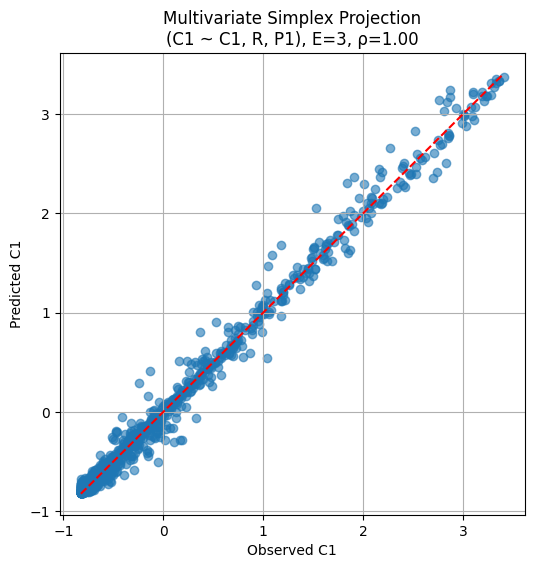

In [18]:

# 1. Extract variables from your solution
C1 = sol.y[1]  # Consumer1
R = sol.y[0]   # Resource
P1 = sol.y[3]  # Predator1

# 2. Normalize each time series
C1 = (C1 - np.mean(C1)) / np.std(C1)
R = (R - np.mean(R)) / np.std(R)
P1 = (P1 - np.mean(P1)) / np.std(P1)

# 3. Create DataFrame
T = len(sol.t)
d = pd.DataFrame({
    "time": np.arange(1, T + 1),
    "C1": C1,
    "R": R,
    "P1": P1
})

# 4. Prepare multivariate block and normalize
embedding = ["C1", "R", "P1"]
block = d[embedding]
block = (block - block.mean()) / block.std()
block["time"] = np.arange(1, T + 1)  # Required by pyEDM

# 5. Define library and prediction ranges
lib_start = 1
lib_end = len(block) // 2
pred_start = lib_end + 1
pred_end = len(block)

lib = f"{lib_start} {lib_end}"
pred = f"{pred_start} {pred_end}"

print("lib =", lib)
print("pred =", pred)

# --- 6. Find best embedding dimension E by minimizing MAE ---
results_list = []
max_E = 20  # Max embedding dimension to test; adjust as needed

for E in range(3, max_E + 1):
    print(f"\nTesting multivariate E={E}")
    res = Simplex(
        dataFrame=block,
        lib=lib,
        pred=pred,
        E=E,
        columns="C1 R P1",
        target="C1",
        embedded=True
    )
    res = res.dropna(subset=["Predictions", "Observations"])
    if len(res) > 0:
        mae = np.mean(np.abs(res["Observations"] - res["Predictions"]))
    else:
        mae = np.nan
    print(f"MAE for E={E}: {mae}")
    results_list.append({"E": E, "MAE": mae})

results_df = pd.DataFrame(results_list)
bestE = results_df.loc[results_df['MAE'].idxmin(), 'E']
print(f"\nBest multivariate embedding dimension E = {bestE}")

# --- 7. Run Simplex with best E ---
mult_simp_C1 = Simplex(
    dataFrame=block,
    lib=lib,
    pred=pred,
    E=bestE,
    columns="C1 R P1",
    target="C1",
    embedded=True
)

# Remove rows with NaNs
mult_simp_C1 = mult_simp_C1.dropna(subset=["Predictions", "Observations"])
C1_pred_mult = mult_simp_C1["Predictions"].values
C1_obs_mult = mult_simp_C1["Observations"].values

# --- 8. Compute forecast skill (correlation) ---
valid = ~np.isnan(C1_obs_mult) & ~np.isnan(C1_pred_mult)

if valid.sum() == 0:
    print("No valid points: forecast skill cannot be computed.")
    rho = np.nan
else:
    rho = np.corrcoef(C1_obs_mult[valid], C1_pred_mult[valid])[0, 1]
    print(f"\nForecast skill (ρ) = {rho:.3f}")

# --- 9. Plot observed vs predicted ---
plt.figure(figsize=(6, 6))
plt.scatter(C1_obs_mult[valid], C1_pred_mult[valid], alpha=0.6)
plt.plot([C1_obs_mult.min(), C1_obs_mult.max()],
         [C1_obs_mult.min(), C1_obs_mult.max()],
         'r--')
plt.xlabel("Observed C1")
plt.ylabel("Predicted C1")
plt.title(f"Multivariate Simplex Projection\n(C1 ~ C1, R, P1), E={bestE}, ρ={rho:.2f}")
plt.grid()
plt.show()


Multi-view embedding

lib = 1 1200
pred = 1201 2400
Testing Simplex E=3
MAE: 0.0618
Testing Simplex E=4
MAE: 0.0618
Testing Simplex E=5
MAE: 0.0618
Testing Simplex E=6
MAE: 0.0618
Testing Simplex E=7
MAE: 0.0618
Testing Simplex E=8
MAE: 0.0618
Testing Simplex E=9
MAE: 0.0618
Testing Simplex E=10
MAE: 0.0618

Best embedding dimension found: E = 3
Forecast skill (ρ) = 0.997


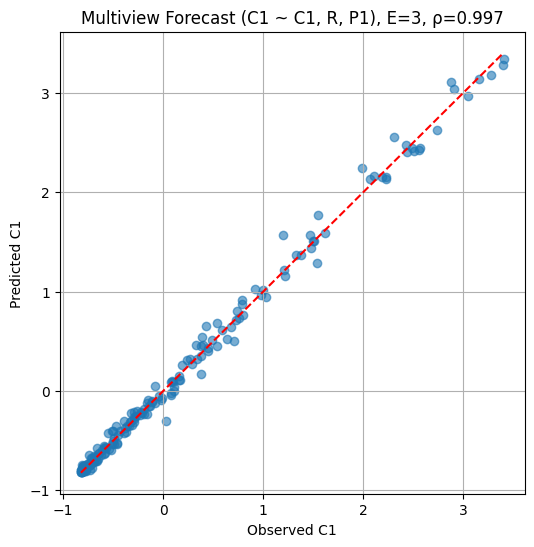

In [23]:

# --- 1. Extract variables from solution ---
C1 = sol.y[1]  # Consumer1
R = sol.y[0]   # Resource
P1 = sol.y[3]  # Predator1

# --- 2. Normalize ---
C1 = (C1 - np.mean(C1)) / np.std(C1)
R = (R - np.mean(R)) / np.std(R)
P1 = (P1 - np.mean(P1)) / np.std(P1)

# --- 3. Create DataFrame ---
T = len(sol.t)
data_used = np.arange(T)
d = pd.DataFrame({
    "time": data_used + 1,
    "C1": C1,
    "R": R,
    "P1": P1
})

# --- 4. Create multiview input block and normalize ---
embedding = ["C1", "R", "P1"]
block = d[embedding]
block = (block - block.mean()) / block.std()
block["time"] = data_used + 1  # required by pyEDM

# --- 5. Define library and prediction ranges ---
lib_start = 1
lib_end = len(block) // 2
pred_start = lib_end + 1
pred_end = len(block)

lib = f"{lib_start} {lib_end}"
pred = f"{pred_start} {pred_end}"

print("lib =", lib)
print("pred =", pred)

# --- 6. Find best embedding dimension E by minimizing MAE with Simplex ---
max_E = 10  # max E to try, adjust if needed
results_list = []

for E in range(3, max_E + 1):
    print(f"Testing Simplex E={E}")
    res = Simplex(
        dataFrame=block,
        lib=lib,
        pred=pred,
        E=E,
        columns="C1 R P1",
        target="C1",
        embedded=True
    )
    res = res.dropna(subset=["Predictions", "Observations"])
    if len(res) > 0:
        mae = np.mean(np.abs(res["Observations"] - res["Predictions"]))
    else:
        mae = np.nan
    print(f"MAE: {mae:.4f}")
    results_list.append({"E": E, "MAE": mae})

results_df = pd.DataFrame(results_list)
bestE = results_df.loc[results_df['MAE'].idxmin(), 'E']
print(f"\nBest embedding dimension found: E = {bestE}")

# --- 7. Run Multiview forecasting with best E ---
multiview_C1 = Multiview(
    dataFrame=block,
    lib=lib,
    pred=pred,
    columns="C1 R P1",
    target="C1",
    E=bestE
)

# --- 8. Extract predictions and observations ---
C1_obs_multv = multiview_C1['Predictions']['Observations'].values
C1_pred_multv = multiview_C1['Predictions']['Predictions'].values

# Optional: limit points for plotting if dataset is large
plot_limit = 200
C1_obs_multv = C1_obs_multv[:plot_limit]
C1_pred_multv = C1_pred_multv[:plot_limit]

# Filter NaNs
valid = ~np.isnan(C1_obs_multv) & ~np.isnan(C1_pred_multv)
C1_obs_multv = C1_obs_multv[valid]
C1_pred_multv = C1_pred_multv[valid]

# --- 9. Compute and print forecast skill ---
if len(C1_obs_multv) == 0:
    print("No valid points: forecast skill cannot be computed.")
    rho = np.nan
else:
    rho = np.corrcoef(C1_obs_multv, C1_pred_multv)[0, 1]
    print(f"Forecast skill (ρ) = {rho:.3f}")

# --- 10. Plot observed vs predicted ---
plt.figure(figsize=(6, 6))
plt.scatter(C1_obs_multv, C1_pred_multv, alpha=0.6)
plt.plot([C1_obs_multv.min(), C1_obs_multv.max()],
         [C1_obs_multv.min(), C1_obs_multv.max()],
         'r--')
plt.xlabel("Observed C1")
plt.ylabel("Predicted C1")
plt.title(f"Multiview Forecast (C1 ~ C1, R, P1), E={bestE}, ρ={rho:.3f}")
plt.grid()
plt.show()



Compare univariate, multivariate, and multiview embeddings

Forecasting skill (ρ) Univariate : 0.985
Forecasting skill (ρ) Multivariate : 0.995
Forecasting skill (ρ) Multiview : 0.997


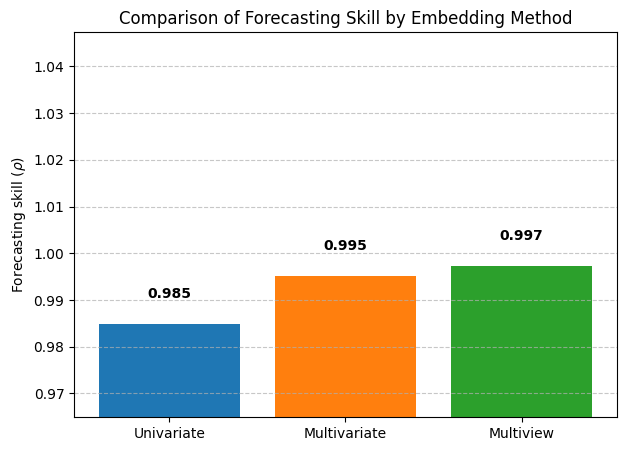

In [24]:


# rho univariate (Simplex univariate)
rho_univariate = np.corrcoef(obs_valid, pred_valid)[0, 1]  # from the last univariate simplex projection

# rho multivariate (Simplex multivariate)
rho_multivariate = np.corrcoef(C1_obs_mult, C1_pred_mult)[0, 1]

# rho multiview
C1_pred_multv = multiview_C1['Predictions'].Predictions[1:200]
C1_obs_multv = multiview_C1['Predictions'].Observations[1:200]
rho_multiview = np.corrcoef(C1_obs_multv, C1_pred_multv)[0, 1]

# Printing the forecasting skills
print(f"Forecasting skill (ρ) Univariate : {rho_univariate:.3f}")
print(f"Forecasting skill (ρ) Multivariate : {rho_multivariate:.3f}")
print(f"Forecasting skill (ρ) Multiview : {rho_multiview:.3f}")

# Reassembling the rhos
rhos = {
    "Univariate": rho_univariate,
    "Multivariate": rho_multivariate,
    "Multiview": rho_multiview
}

# Plotting the barplot
plt.figure(figsize=(7, 5))
bars = plt.bar(rhos.keys(), rhos.values(), color=["C0", "C1", "C2"])
plt.ylim([min(rhos.values()) - 0.02, max(rhos.values()) + 0.05])
plt.ylabel(r"Forecasting skill ($\rho$)")
plt.title("Comparison of Forecasting Skill by Embedding Method")
plt.grid(axis="y", linestyle="--", alpha=0.7)

for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height + 0.005,
        f"{height:.3f}",
        ha='center',
        va='bottom',
        fontsize=10,
        fontweight='bold'
    )

plt.show()


Tracking interaction strength using S-map

Load the data from the same simulation and apply Smap

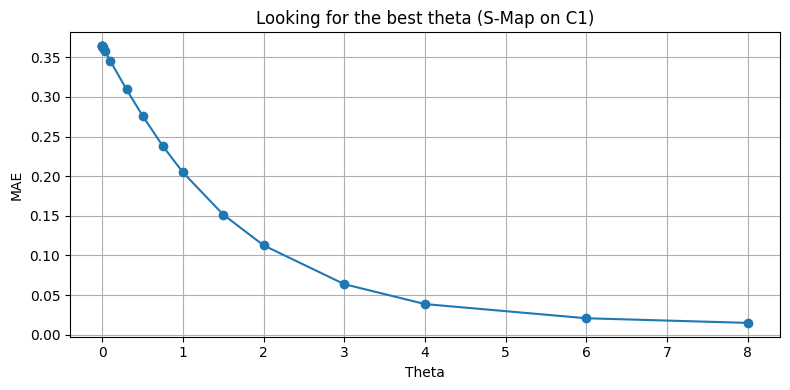

Best Theta : 8.0


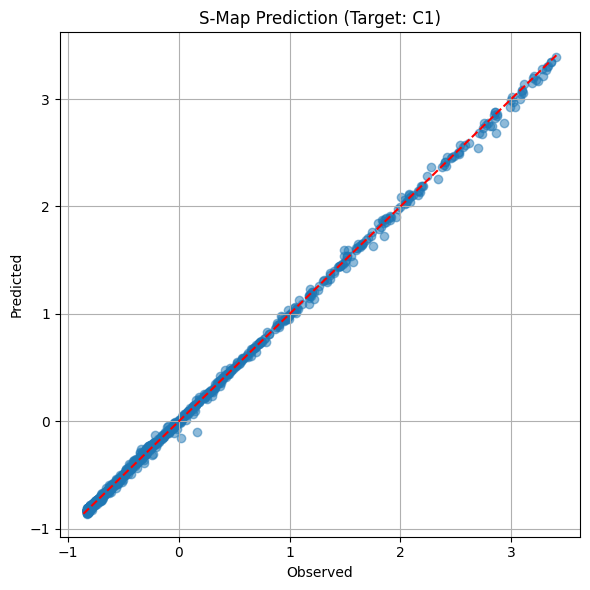

Coefficient columns: ['Time', 'C0', '∂C1/∂R', '∂C1/∂C1', '∂C1/∂C2', '∂C1/∂P1']


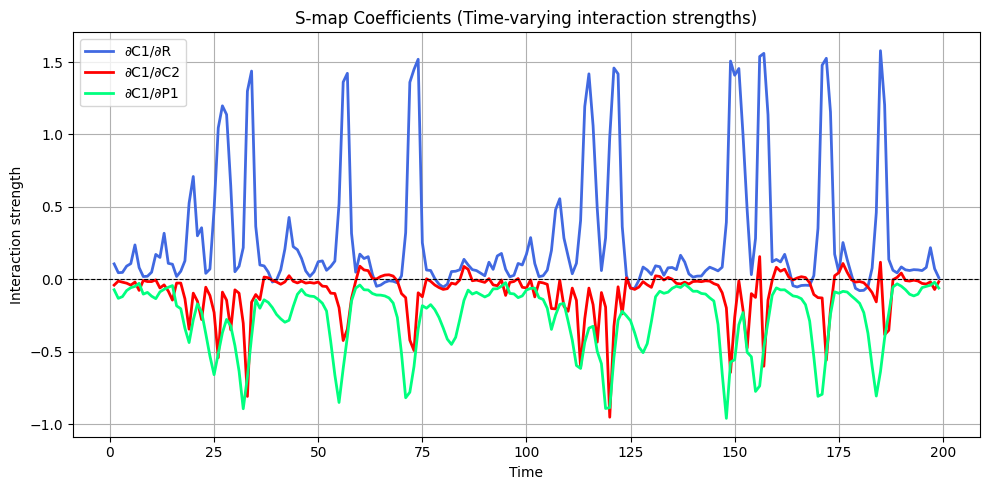

In [21]:
# --- Step 1: Extract variables from the food web solution ---
R = sol.y[0]
C1 = sol.y[1]
C2 = sol.y[2]
P1 = sol.y[3]

# --- Step 2: Normalize each variable ---
def normalize(x):
    return (x - np.mean(x)) / np.std(x)

R = normalize(R)
C1 = normalize(C1)
C2 = normalize(C2)
P1 = normalize(P1)

# --- Step 3: Create DataFrame ---
df = pd.DataFrame({
    "R": R,
    "C1": C1,
    "C2": C2,
    "P1": P1
})

df["Time"] = np.arange(len(df)) + 1  # 1-based time index for pyEDM

# --- Step 4: Define library and prediction intervals ---
data_length = len(df)
lib_start = 1
lib_end = data_length // 2
pred_start = lib_end + 1
pred_end = data_length

lib = f"{lib_start} {lib_end}"
pred = f"{pred_start} {pred_end}"

# --- Step 5: Define embedding and theta values ---
embedding = ["R", "C1", "C2", "P1"]
df_used = df.iloc[lib_start - 1:pred_end].reset_index(drop=True)

thetas = [0, 1e-4, 3e-4, 0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 0.5, 0.75, 1, 1.5, 2, 3, 4, 6, 8]
results = []

# --- Step 6: Tune theta based on prediction of C1 ---
for theta in thetas:
    res = SMap(
        dataFrame=df_used,
        lib=lib,
        pred=pred,
        columns=embedding,
        target="C1",
        theta=theta,
        E=len(embedding),
        embedded=True,
        showPlot=False
    )
    observations = res['predictions'].Observations.to_numpy()
    predictions = res['predictions'].Predictions.to_numpy()
    valid = ~np.isnan(observations) & ~np.isnan(predictions)
    mae = mean_absolute_error(observations[valid], predictions[valid])
    results.append((theta, mae))

# --- Step 7: Plot MAE vs Theta ---
df_theta = pd.DataFrame(results, columns=["theta", "mae"])
plt.figure(figsize=(8, 4))
plt.plot(df_theta["theta"], df_theta["mae"], marker='o')
plt.xlabel("Theta")
plt.ylabel("MAE")
plt.title("Looking for the best theta (S-Map on C1)")
plt.grid(True)
plt.tight_layout()
plt.show()

# --- Step 8: Best theta and final SMap run ---
best_theta = df_theta.loc[df_theta["mae"].idxmin(), "theta"]
print(f"Best Theta : {best_theta}")

smap_res = SMap(
    dataFrame=df_used,
    lib=lib,
    pred=pred,
    columns=embedding,
    target="C1",
    theta=best_theta,
    E=len(embedding),
    embedded=True,
    showPlot=False
)

# --- Step 9: Observed vs Predicted ---
predictions_data = smap_res['predictions']
plt.figure(figsize=(6, 6))
plt.scatter(predictions_data.Observations, predictions_data.Predictions, alpha=0.5)
min_val = min(predictions_data.Observations.min(), predictions_data.Predictions.min())
max_val = max(predictions_data.Observations.max(), predictions_data.Predictions.max())
plt.plot([min_val, max_val], [min_val, max_val], 'r--')
plt.xlabel("Observed")
plt.ylabel("Predicted")
plt.title(f"S-Map Prediction (Target: C1)")
plt.grid(True)
plt.tight_layout()
plt.show()

# --- Step 10: Plot Coefficients over Time ---
coefficients = smap_res['coefficients']
print("Coefficient columns:", coefficients.columns.tolist())

time_range = range(min(200, len(coefficients)))  # limit to 200 time steps
plt.figure(figsize=(10, 5))
plt.plot(time_range, coefficients.loc[time_range, '∂C1/∂R'], label='∂C1/∂R', color="royalblue", linewidth=2)
plt.plot(time_range, coefficients.loc[time_range, '∂C1/∂C2'], label='∂C1/∂C2', color="red", linewidth=2)
plt.plot(time_range, coefficients.loc[time_range, '∂C1/∂P1'], label='∂C1/∂P1', color="springgreen", linewidth=2)
plt.axhline(0, color="black", linestyle="dashed", linewidth=0.8)
plt.xlabel("Time")
plt.ylabel("Interaction strength")
plt.title("S-map Coefficients (Time-varying interaction strengths)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Scenario exploration

Best embedding dimension for C1: 1


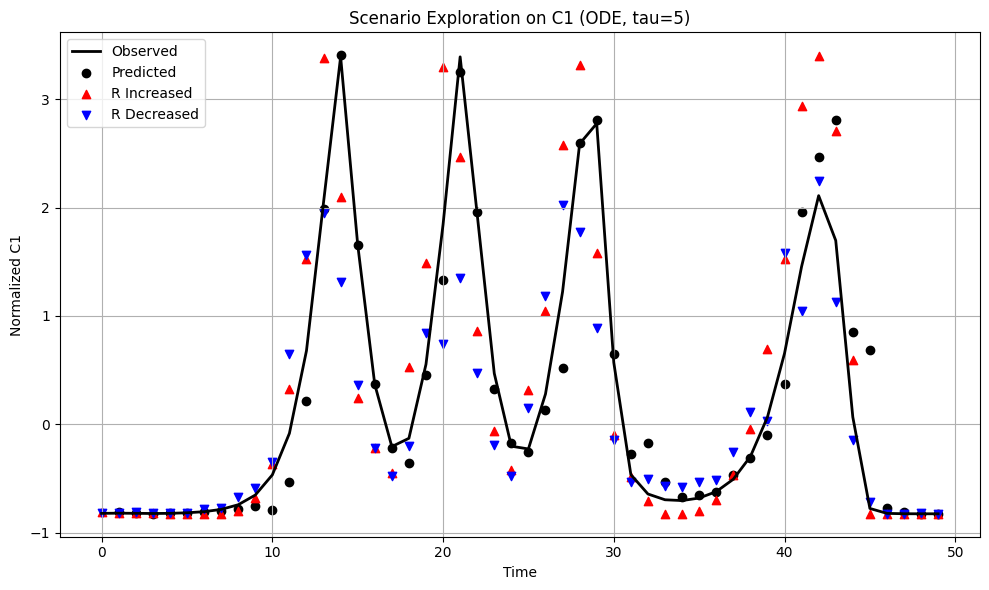

In [22]:

# --- Food web ODE model ---
def food_web(t, y, params):
    R, C1, C2, P1, P2 = y
    R, C1, C2, P1, P2 = map(lambda x: max(x, 1e-8), (R, C1, C2, P1, P2))
    nu1, nu2 = params['nu1'], params['nu2']
    lambda1, lambda2 = params['lambda1'], params['lambda2']
    C1star, C2star = params['C1star'], params['C2star']
    mu1, mu2 = params['mu1'], params['mu2']
    kappa1, kappa2 = params['kappa1'], params['kappa2']
    Rstar, k = params['Rstar'], params['k']

    dRdt = R * (1 - R / k) - mu1 * kappa1 * (C1 * R) / (R + Rstar) - mu2 * kappa2 * (C2 * R) / (R + Rstar)
    dC1dt = mu1 * kappa1 * (C1 * R) / (R + Rstar) - nu1 * lambda1 * (P1 * C1) / (C1 + C1star) - mu1 * C1
    dC2dt = mu2 * kappa2 * (C2 * R) / (R + Rstar) - nu2 * lambda2 * (P2 * C2) / (C2 + C2star) - mu2 * C2
    dP1dt = nu1 * lambda1 * (P1 * C1) / (C1 + C1star) - nu1 * P1
    dP2dt = nu2 * lambda2 * (P2 * C2) / (C2 + C2star) - nu2 * P2
    return [dRdt, dC1dt, dC2dt, dP1dt, dP2dt]

# --- Parameters ---
params = {
    'nu1': 0.1, 'nu2': 0.07,
    'lambda1': 3.2, 'lambda2': 2.9,
    'C1star': 0.5, 'C2star': 0.5,
    'mu1': 0.15, 'mu2': 0.15,
    'kappa1': 2.5, 'kappa2': 2.0,
    'Rstar': 0.3,
    'k': 1.2
}

# --- Initial condition + burn-in ---
y0 = [1.0, 0.5, 0.8, 0.7, 0.8]
Xi = np.array(y0)
dt = 0.01
for _ in range(int(200 / dt)):
    Xi += dt * np.array(food_web(0, Xi, params))

# --- Integration ---
tmax = 12000
tau = 5
t_eval = np.arange(0, tmax, tau)
sol = solve_ivp(food_web, (0, tmax), Xi, args=(params,), t_eval=t_eval, rtol=1e-6, atol=1e-9)

# --- Store result ---
df = pd.DataFrame({
    'R': sol.y[0],
    'C1': sol.y[1],
    'C2': sol.y[2],
    'P1': sol.y[3],
    'P2': sol.y[4],
})

# --- Normalize ---
df_norm = (df - df.mean()) / df.std()

# --- Find best E for C1 ---
N = len(df_norm)
lib_end = int(N * 2 / 3)
pred_start = lib_end + 1
results = []

for E in range(1, 11):
    res = Simplex(dataFrame=df_norm, lib=f"1 {lib_end}", pred=f"{pred_start} {N}",
                  columns="C1", target="C1", E=E, verbose=False)
    obs = res["Observations"].dropna().values
    pred = res["Predictions"].dropna().values
    mae = np.mean(np.abs(obs - pred)) if len(obs) == len(pred) and len(obs) > 0 else np.nan
    results.append({"E": E, "MAE": mae})

results_df = pd.DataFrame(results)
E_C1 = results_df.loc[results_df["MAE"].idxmin(), "E"]
print(f"Best embedding dimension for C1: {E_C1}")

# --- Create multivariate embedding: C1 past + R now ---
embed_C1 = np.column_stack([
    df_norm["C1"].values[i:N - E_C1 + i + 1] for i in range(E_C1)
])
R_trim = df_norm["R"].values[E_C1 - 1:]
block0 = np.column_stack([embed_C1, R_trim])
col_names = [f"C1_t_{i}" for i in reversed(range(E_C1))] + ["R_t"]

# --- Scenarios: R up/down ---
block_inc0 = np.column_stack([embed_C1, R_trim + 0.5])
block_dec0 = np.column_stack([embed_C1, R_trim - 0.5])

df_block0 = pd.DataFrame(block0, columns=col_names)
pred_nochange = Simplex(df_block0, lib=f"1 {len(block0)}", pred=f"1 {len(block0)}",
                        columns=col_names, target=col_names[0], E=E_C1, verbose=False)

# --- Scenario predictions ---
n0 = len(block0)
block_inc_all = np.vstack([block0, block_inc0])
block_dec_all = np.vstack([block0, block_dec0])
df_block_inc = pd.DataFrame(block_inc_all, columns=col_names)
df_block_dec = pd.DataFrame(block_dec_all, columns=col_names)

step = 100
predictions_inc, predictions_dec = [], []

for start_pred in range(n0 + 1, n0 + len(block_inc0) + 1, step):
    end_pred = min(start_pred + step - 1, n0 + len(block_inc0))

    res_inc = Simplex(df_block_inc, lib=f"1 {n0}", pred=f"{start_pred} {end_pred}",
                      columns=col_names, target=col_names[0], E=E_C1, verbose=False)
    predictions_inc.append(res_inc["Predictions"].dropna())

    res_dec = Simplex(df_block_dec, lib=f"1 {n0}", pred=f"{start_pred} {end_pred}",
                      columns=col_names, target=col_names[0], E=E_C1, verbose=False)
    predictions_dec.append(res_dec["Predictions"].dropna())

pred_increase = pd.concat(predictions_inc)
pred_decrease = pd.concat(predictions_dec)

# --- Plot ---
trange = range(50)
plt.figure(figsize=(10, 6))
plt.plot(pred_nochange.iloc[trange]["Observations"].values, label="Observed", color="black", linewidth=2)
plt.scatter(trange, pred_nochange.iloc[trange]["Predictions"].values, label="Predicted", color="black", marker='o')
plt.scatter(trange, pred_increase.values[:len(trange)], label="R Increased", color="red", marker='^')
plt.scatter(trange, pred_decrease.values[:len(trange)], label="R Decreased", color="blue", marker='v')
plt.xlabel("Time")
plt.ylabel("Normalized C1")
plt.title("Scenario Exploration on C1 (ODE, tau=5)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()